In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import json

## Data Source files.

In [2]:
covid_data_csv = "covid_data.csv"
cardio_base_csv = "cardio_base.csv"
cardio_alco_csv = "cardio_alco.csv"

In [5]:
data = pd.read_csv(covid_data_csv, parse_dates=["date"])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23082 entries, 0 to 23081
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   location                    23082 non-null  object        
 1   date                        23082 non-null  datetime64[ns]
 2   new_cases                   23082 non-null  int64         
 3   new_deaths                  23082 non-null  int64         
 4   population                  23018 non-null  float64       
 5   aged_65_older_percent       20643 non-null  float64       
 6   gdp_per_capita              20711 non-null  float64       
 7   hospital_beds_per_thousand  19144 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 1.4+ MB


In [7]:
data.head()

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5
3,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5
4,Afghanistan,2020-01-04,0,0,38928341.0,2.581,1803.987,0.5


In [32]:
is_international = data["location"] != "International"
is_world = data["location"] != "World"

In [33]:
countries_only = data[international & world]

In [34]:
countries_only.head()

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5
3,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5
4,Afghanistan,2020-01-04,0,0,38928341.0,2.581,1803.987,0.5


In [35]:
countries_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22855 entries, 0 to 22854
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   location                    22855 non-null  object        
 1   date                        22855 non-null  datetime64[ns]
 2   new_cases                   22855 non-null  int64         
 3   new_deaths                  22855 non-null  int64         
 4   population                  22855 non-null  float64       
 5   aged_65_older_percent       20480 non-null  float64       
 6   gdp_per_capita              20548 non-null  float64       
 7   hospital_beds_per_thousand  18981 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 1.6+ MB


### Dealing with NaN values. 

- In this specific data set. I will exclude some columns with Nan values depending on what I am analysing. Or drop rows with NaN values depending on whether those rows are important for ta particular analysis. For example, I will need to drop rows with Nan on columns dealing with age if I am doing an analysis on age and covid.

In [51]:
with open("simpler_countries.json", encoding="utf-8") as geo:
    text = geo.readlines()
    file = json.loads(text[0])

In [53]:
country_names = [file["features"][i]["properties"]["admin"] for i in range(len(file["features"]))]
iso_codes = [file["features"][i]["properties"]["iso_a3"] for i in range(len(file["features"]))]
country_with_iso_codes = dict(zip(country_names, iso_codes))

In [57]:
geo_data = {"location":country_names, "iso_3":iso_codes}
df_country_geo = pd.DataFrame(geo_data)

In [59]:
countries_with_iso_codes = countries_only.merge(df_country_geo, how="inner", on="location")

In [124]:
countries_with_iso_codes["num_cases"] = countries_with_iso_codes.groupby("location").agg({"new_cases": "cumsum"})

In [129]:
countries_with_iso_codes["year"] = countries_with_iso_codes["date"].dt.year

In [143]:
countries_with_iso_codes[countries_with_iso_codes["location"].eq("Italy")]

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand,iso_3,num_cases,year
8058,Italy,2019-12-31,0,0,60461828.0,23.021,35220.084,3.18,ITA,0,2019
8059,Italy,2020-01-01,0,0,60461828.0,23.021,35220.084,3.18,ITA,0,2020
8060,Italy,2020-01-02,0,0,60461828.0,23.021,35220.084,3.18,ITA,0,2020
8061,Italy,2020-01-03,0,0,60461828.0,23.021,35220.084,3.18,ITA,0,2020
8062,Italy,2020-01-04,0,0,60461828.0,23.021,35220.084,3.18,ITA,0,2020
...,...,...,...,...,...,...,...,...,...,...,...
8216,Italy,2020-06-06,518,85,60461828.0,23.021,35220.084,3.18,ITA,234531,2020
8217,Italy,2020-06-07,270,72,60461828.0,23.021,35220.084,3.18,ITA,234801,2020
8218,Italy,2020-06-08,197,53,60461828.0,23.021,35220.084,3.18,ITA,234998,2020
8219,Italy,2020-06-09,280,65,60461828.0,23.021,35220.084,3.18,ITA,235278,2020


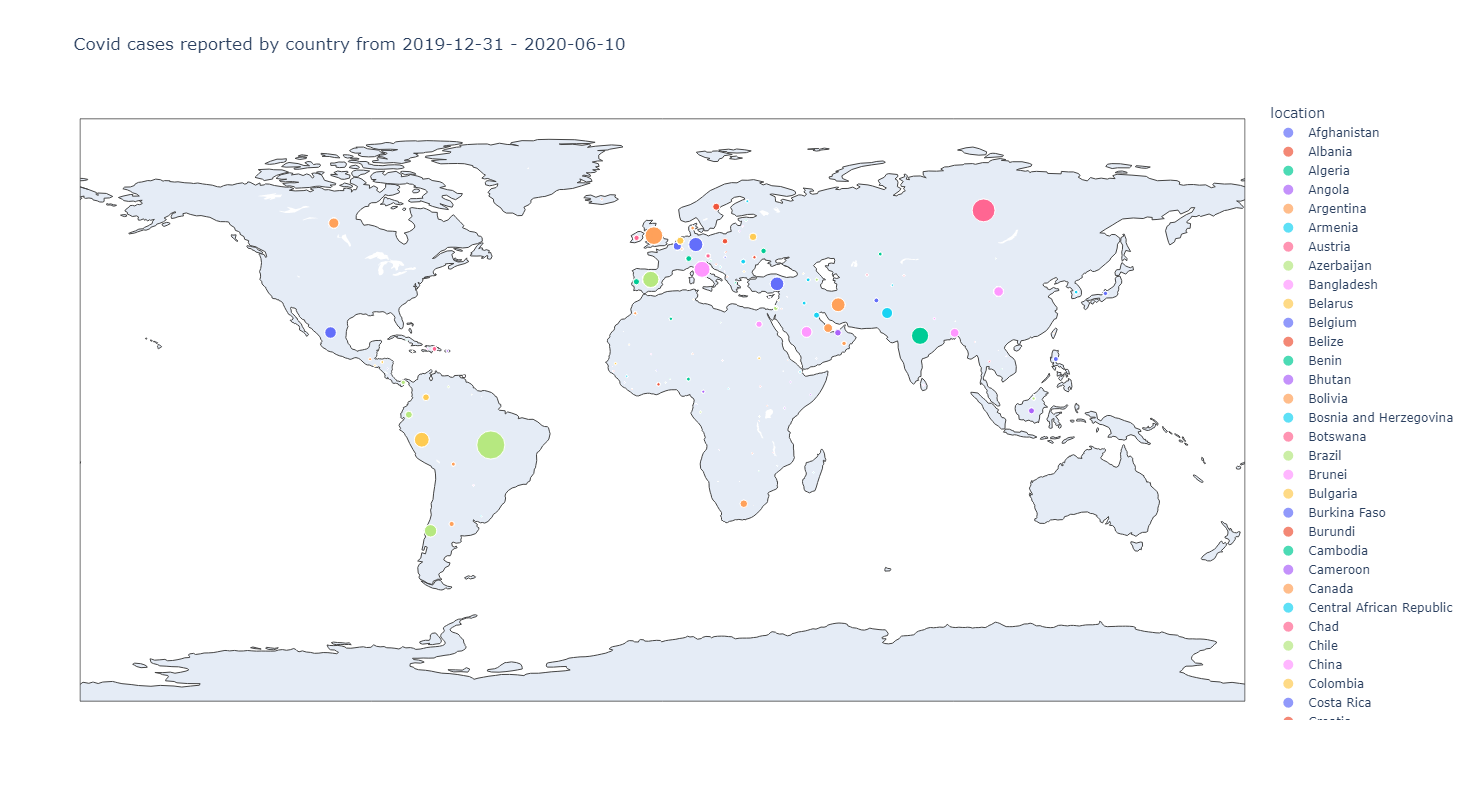

In [148]:
fig = px.scatter_geo(countries_with_iso_codes, 
                     locations="iso_3", 
                     color="location", 
                     size="num_cases",  
                     height=800, width=1300, title="Covid cases reported by country from 2019-12-31 - 2020-06-10")

fig.show()

<img src="case_numbers..png">